# Import libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
sns.set()

### Load data

In [10]:
train_data = pd.read_csv('I:\\Analytics\\all\\sales_train\\sales_train_v2.csv')

In [13]:
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [14]:
item_categories = pd.read_csv('I:\\Analytics\\all\\item_categories.csv')

In [16]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [18]:
items = pd.read_csv('I:\\Analytics\\all\\items.csv')

In [19]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [20]:
shops = pd.read_csv('I:\\Analytics\\all\\shops.csv')

In [21]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


### Convert date column to datettime from string

In [37]:
train_data['date'] = pd.to_datetime(train_data['date'].apply(lambda x: datetime.strptime(x,'%d.%m.%Y')))

### Check daily cumulative sales trend

In [39]:
daily_cumulative_sales = train_data.groupby(['date'])['item_cnt_day'].sum()

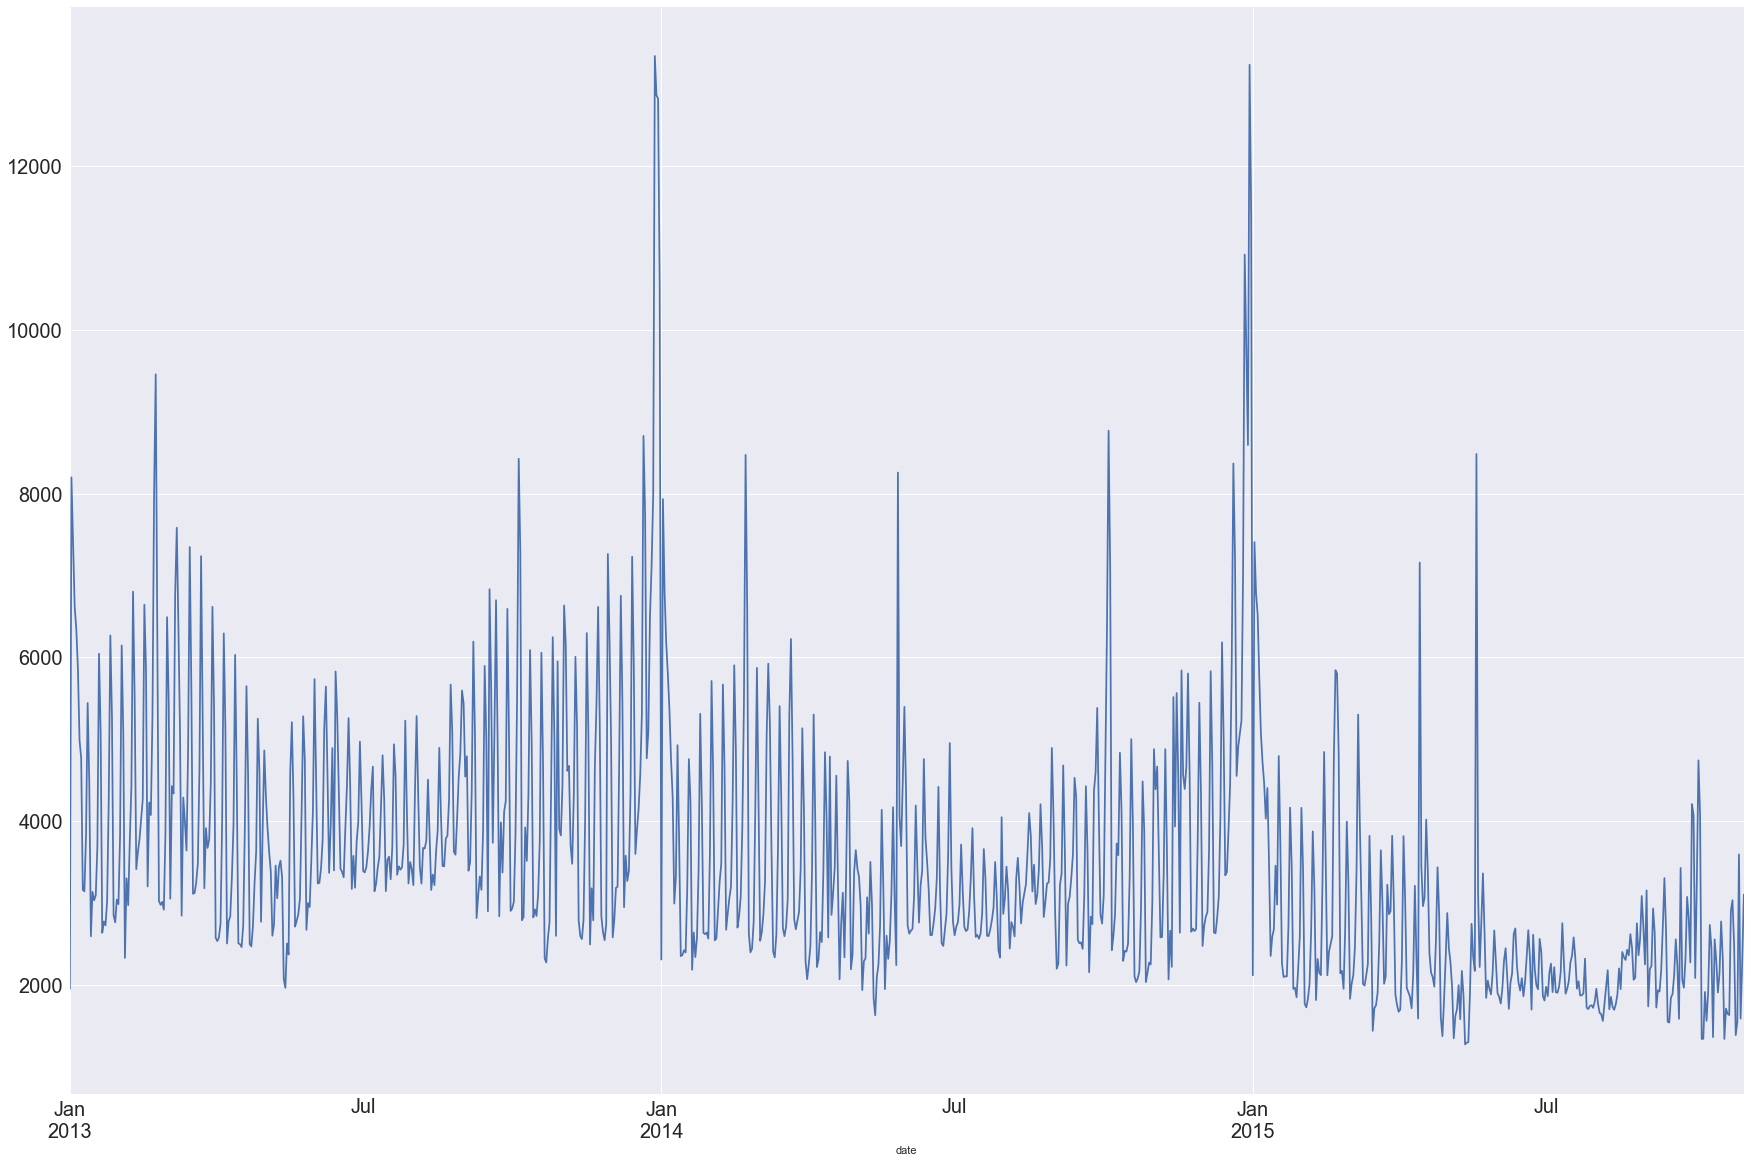

In [46]:
daily_cumulative_sales.plot(figsize=(30,20),fontsize=20)

### Check monthly vs quarterly cumulative sales rolling mean trend

In [51]:
cum_sales_rm = pd.concat([daily_cumulative_sales.rolling(30).mean(),daily_cumulative_sales.rolling(90).mean()],axis=1)

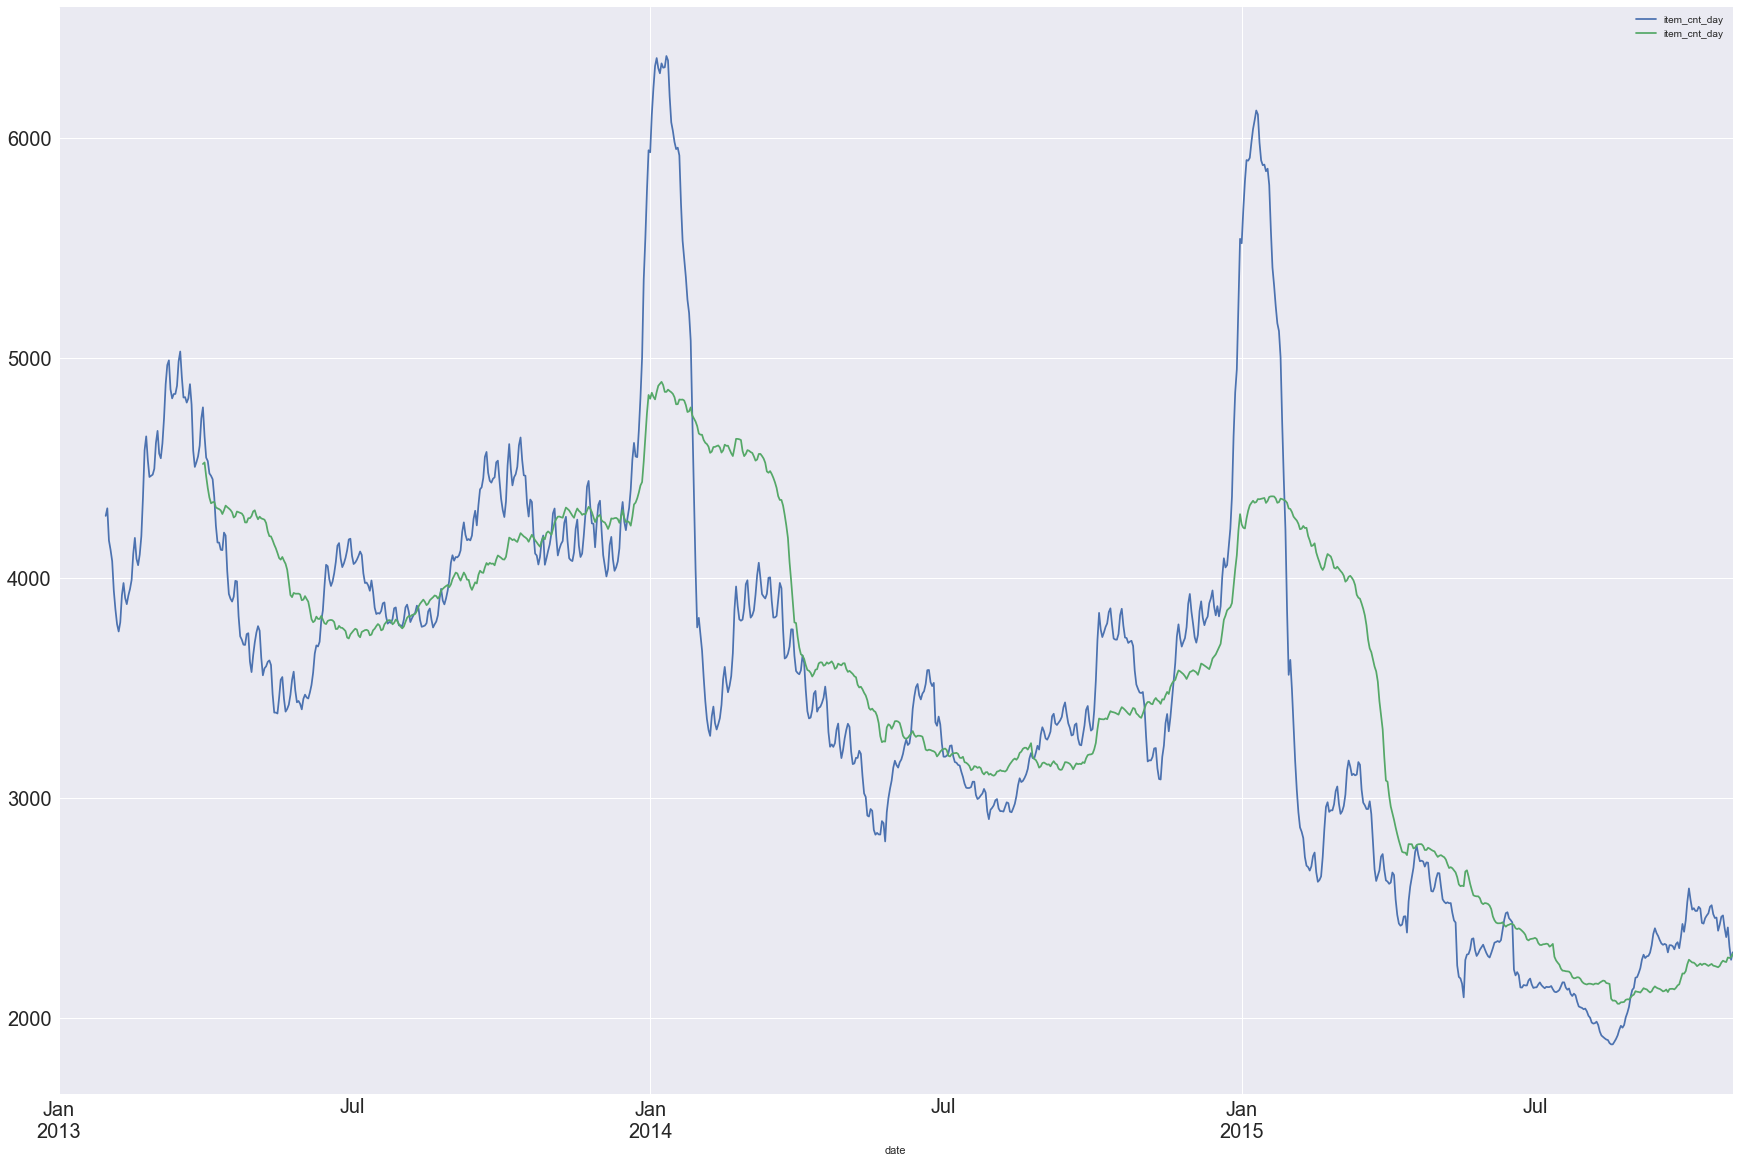

In [52]:
cum_sales_rm.plot(figsize=(30,20),fontsize=20)

# 